In [24]:
import pandas as pd

In [146]:
df = pd.read_csv('~/usr_python/bin/cleaned_landsend_veg_2007_2012.csv')

In [147]:
df.head()

,site_year_code,transect,point,height,species,native_status,life_history,plant_code,stature
0,NUWO-2012,5,90,Low,NaN,NaN,NaN,NaN,NaN
1,NUWO-2012,13,150,Low,NaN,NaN,NaN,NaN,NaN
2,NMS-2010,8,20,Low,Achillea millefolium,Native,Perennial,ACMI,Forb
3,NMS-2010,24,4,Low,Achillea millefolium,Native,Perennial,ACMI,Forb
4,NMS-2010,48,16,Low,Achillea millefolium,Native,Perennial,ACMI,Forb


In [148]:
df_yr_sp = df[["site_year_code", "stature","species"]]
valid = ~ df_yr_sp.applymap( lambda x: x == "-").any(axis=1)
df_yr_sp = df_yr_sp.loc[valid]

In [149]:
get_year = lambda x : int(x.split("-")[-1])
df_yr_sp["year"] = df_yr_sp["site_year_code"].map( get_year )

get_site = lambda x : (x.split("-")[0])
df_yr_sp["site"] = df_yr_sp["site_year_code"].map( get_site )

df_yr_sp.drop("site_year_code", axis=1, inplace = True)

In [150]:
cols = ["stature","site", "year"]
df_yr_sp["count"] = 1

stature_site_yr = pd.pivot_table(
    df_yr_sp.groupby(cols).agg("count").reset_index().\
    drop("species", axis = 1).groupby(["stature","site","year"]).\
    agg(sum).reset_index(), index = "stature", columns = ["site","year"]).fillna(0)["count"]
stature_site_yr.head()

site       EAPO  NMS           NUWO           SUDO                     SUDU  \
year       2011 2010 2011 2012 2010 2011 2012 2010 2011 2012 2013 2014 2008   
stature                                                                       
Forb         41   82   39  109   33   25   41   92   42   44    2    0   57   
Grass       108   78   63   97  166   41  175   31   35    4    0    0   19   
Rush/Sedge    0    0    0    0    0    0    0    1    0    0    0    0    0   
Shrub       160   28   12   63   22   10   20   73   59   82    2    1  115   
Tree          0    6    2    0   57    0   61    1    0    1    0    0    0   

site             
year       2009  
stature          
Forb        110  
Grass        53  
Rush/Sedge    0  
Shrub       143  
Tree          1

In [151]:
stature_site_yr["SUDU"]

year,2008,2009
stature,,
Forb,57,110
Grass,19,53
Rush/Sedge,0,0
Shrub,115,143
Tree,0,1


In [153]:
import matplotlib.pyplot as plt
%matplotlib inline

--------------Stature Diversity Across Years For each Site--------------

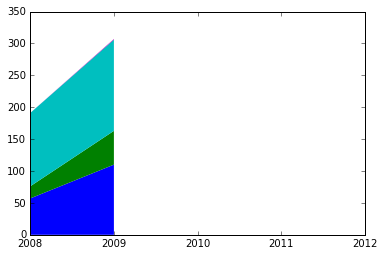

In [170]:
sudu_site = stature_site_yr["SUDU"]
x = sudu_site.columns.tolist()
fig, ax = plt.subplots()
ax.stackplot(x, sudu_site.as_matrix(), edgecolor="None")
plt.xticks(range(2008, 2014))
x_formatter = plt.matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.gca().xaxis.set_major_formatter(x_formatter)
plt.xlim((2008, 2012))
pass

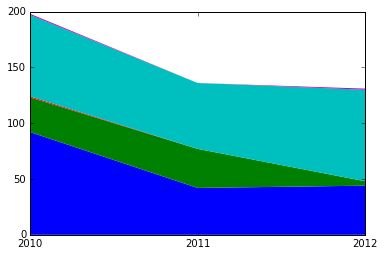

In [166]:
sudo_site = stature_site_yr["SUDO"]
x = sudo_site.columns.tolist()
fig, ax = plt.subplots()
ax.stackplot(x, sudo_site.as_matrix(), edgecolor="None")
plt.xticks(range(2010, 2014))
x_formatter = plt.matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.gca().xaxis.set_major_formatter(x_formatter)
plt.xlim((2010, 2012))
pass

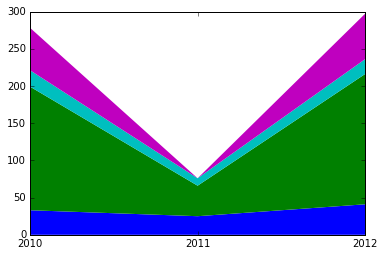

In [165]:
nuwo_site = stature_site_yr["NUWO"]
x = nuwo_site.columns.tolist()
fig, ax = plt.subplots()
ax.stackplot(x, nuwo_site.as_matrix(), edgecolor="None")
plt.xticks(range(2010, 2014))
x_formatter = plt.matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.gca().xaxis.set_major_formatter(x_formatter)
plt.xlim((2010, 2012))
pass

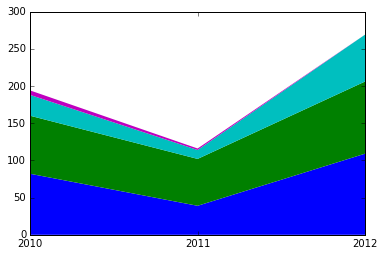

In [164]:
nms_site = stature_site_yr["NMS"]
x = nms_site.columns.tolist()
fig, ax = plt.subplots()
ax.stackplot(x, nms_site.as_matrix(), edgecolor="None")
plt.xticks(range(2010, 2014))
x_formatter = plt.matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.gca().xaxis.set_major_formatter(x_formatter)
plt.xlim((2010, 2012))
pass